<img src="drought.jpg">

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white")
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings('ignore')


> # Read and explore data

In [80]:
df = pd.read_csv(r'/content/drive/MyDrive/datasets/million.csv')

In [81]:
df.head()

,Unnamed: 0,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Unnamed: 0   1000000 non-null  int64  
 1   fips         1000000 non-null  int64  
 2   date         1000000 non-null  object 
 3   PRECTOT      1000000 non-null  float64
 4   PS           1000000 non-null  float64
 5   QV2M         1000000 non-null  float64
 6   T2M          1000000 non-null  float64
 7   T2MDEW       1000000 non-null  float64
 8   T2MWET       1000000 non-null  float64
 9   T2M_MAX      1000000 non-null  float64
 10  T2M_MIN      1000000 non-null  float64
 11  T2M_RANGE    1000000 non-null  float64
 12  TS           1000000 non-null  float64
 13  WS10M        1000000 non-null  float64
 14  WS10M_MAX    1000000 non-null  float64
 15  WS10M_MIN    1000000 non-null  float64
 16  WS10M_RANGE  1000000 non-null  float64
 17  WS50M        1000000 non-null  float64
 18  WS5

In [83]:
df.describe()

,Unnamed: 0,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,142834.000000
mean,499999.500000,3331.800690,3.215789,98.612303,9.294880,16.678672,10.401386,10.427738,23.115582,10.932527,...,16.678349,2.466273,3.616558,1.370176,2.246384,4.439995,6.338823,2.455308,3.883511,0.951106
std,288675.278932,1942.428214,7.636771,4.240493,4.797724,9.304249,9.126218,9.079678,9.640878,9.183328,...,9.510650,1.154552,1.774730,0.826389,1.346935,1.622138,1.951771,1.579963,1.531042,1.299212
min,0.000000,1001.000000,0.000000,77.480000,0.470000,-15.700000,-25.460000,-22.650000,-11.910000,-21.450000,...,-16.570000,0.270000,0.540000,0.000000,0.250000,0.400000,0.780000,0.000000,0.500000,0.000000
25%,249999.750000,1081.000000,0.000000,98.600000,4.950000,9.340000,3.150000,3.170000,16.010000,3.390000,...,9.140000,1.670000,2.360000,0.790000,1.340000,3.300000,5.060000,1.220000,2.800000,0.000000
50%,499999.500000,4025.000000,0.110000,99.850000,8.820000,17.780000,11.730000,11.730000,24.210000,11.620000,...,17.710000,2.180000,3.140000,1.280000,1.860000,4.200000,5.990000,2.230000,3.670000,0.032200
75%,749999.250000,5077.000000,2.520000,100.690000,13.420000,24.710000,18.420000,18.420000,30.870000,19.210000,...,24.850000,2.970000,4.380000,1.790000,2.740000,5.280000,7.190000,3.430000,4.680000,1.766900
max,999999.000000,6009.000000,142.610000,103.740000,21.190000,40.670000,26.060000,26.060000,49.310000,33.000000,...,43.530000,13.860000,19.460000,11.000000,15.470000,19.750000,26.080000,15.210000,18.730000,5.000000


In [84]:
df.isna().sum()

Unnamed: 0          0
fips                0
date                0
PRECTOT             0
PS                  0
QV2M                0
T2M                 0
T2MDEW              0
T2MWET              0
T2M_MAX             0
T2M_MIN             0
T2M_RANGE           0
TS                  0
WS10M               0
WS10M_MAX           0
WS10M_MIN           0
WS10M_RANGE         0
WS50M               0
WS50M_MAX           0
WS50M_MIN           0
WS50M_RANGE         0
score          857166
dtype: int64

In [85]:
df.duplicated().sum()

0

In [86]:
del df['Unnamed: 0']

> # Feature engineering

* working with date

In [87]:
df['date'] = pd.to_datetime(df['date'])

In [88]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
del df['date']

dew point(td) = Temprature(T) - (( 100 - relative Humidity(RH) ) / 5)

In [89]:
df['td'] = df['T2M']-((100-df['QV2M'])/5)

In [90]:
def heatIndex(T,H):
    return ( -42.379 + (2.04901523 * T) + (10.14333127 * H) - (0.22475541 * T*H) - (6.83783e-3 * T*T) - (5.481717e-2 * H*H) + (1.22874e-3 * T*T*H) + (8.5282e-4 * T*H*H) - (1.99e-6 * T*T*H*H) )

In [91]:
df['hi'] = df.apply(lambda x :heatIndex(x.T2M , x.QV2M) , axis =1)

In [92]:
df.head()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day,td,hi
0,1001,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,...,4.85,6.04,3.23,2.81,NaN,2000,1,1,-3.330,50.853402
1,1001,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,10.18,...,5.33,6.13,3.72,2.41,NaN,2000,1,2,-1.226,55.620565
2,1001,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,...,7.53,9.52,5.87,3.66,NaN,2000,1,3,0.842,63.029548
3,1001,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,...,6.73,9.31,3.74,5.58,1.0,2000,1,4,-7.316,27.917794
4,1001,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,...,2.94,4.85,0.65,4.19,NaN,2000,1,5,-15.550,-7.602794


In [93]:
fips = pd.read_csv('/content/fips.csv')

In [94]:
fips.head()

,fips,name
0,1001,Autauga
1,1003,Baldwin
2,1005,Barbour
3,1007,Bibb
4,1009,Blount


In [95]:
fips = fips.set_index('fips').T.to_dict()

In [96]:
df['state'] = ''

In [97]:
df['state'] = df['fips'].apply(lambda x : fips[x]['name'])

In [98]:
del df['fips']

In [99]:
df.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day,td,hi,state
0,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,14.65,...,6.04,3.23,2.81,NaN,2000,1,1,-3.330,50.853402,Autauga
1,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,10.18,16.60,...,6.13,3.72,2.41,NaN,2000,1,2,-1.226,55.620565,Autauga
2,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,...,9.52,5.87,3.66,NaN,2000,1,3,0.842,63.029548,Autauga
3,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,...,9.31,3.74,5.58,1.0,2000,1,4,-7.316,27.917794,Autauga
4,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,...,4.85,0.65,4.19,NaN,2000,1,5,-15.550,-7.602794,Autauga


In [100]:
df['state'].value_counts()

Lee           12420
Washington    12420
Monroe        12420
Montgomery    12420
Lawrence      12420
              ...  
Morgan         6210
Mobile         6210
Marshall       6210
Marengo        6210
Calaveras       190
Name: state, Length: 144, dtype: int64

> # univariet analysis

In [101]:
numeric = df.select_dtypes(include=np.number).columns.tolist()

In [102]:
numeric.remove('year')
numeric.remove('day')
numeric.remove('month')
numeric.remove('score')

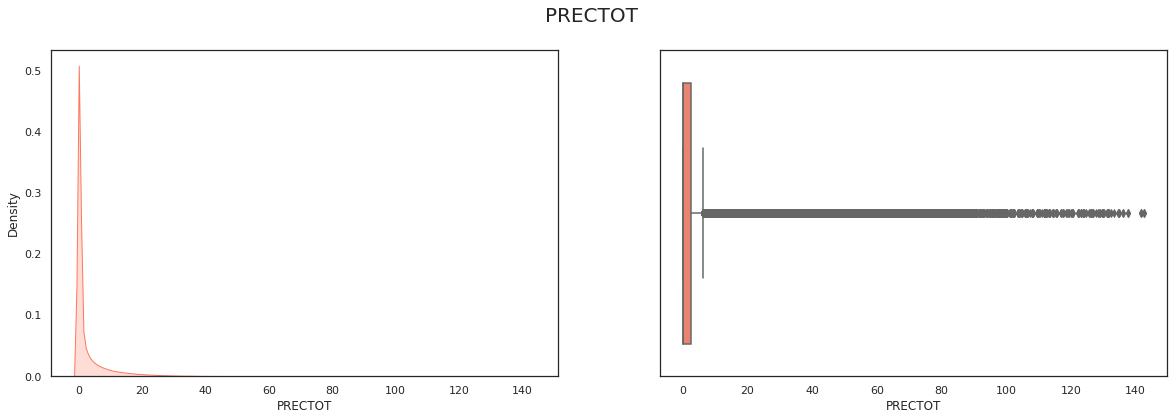

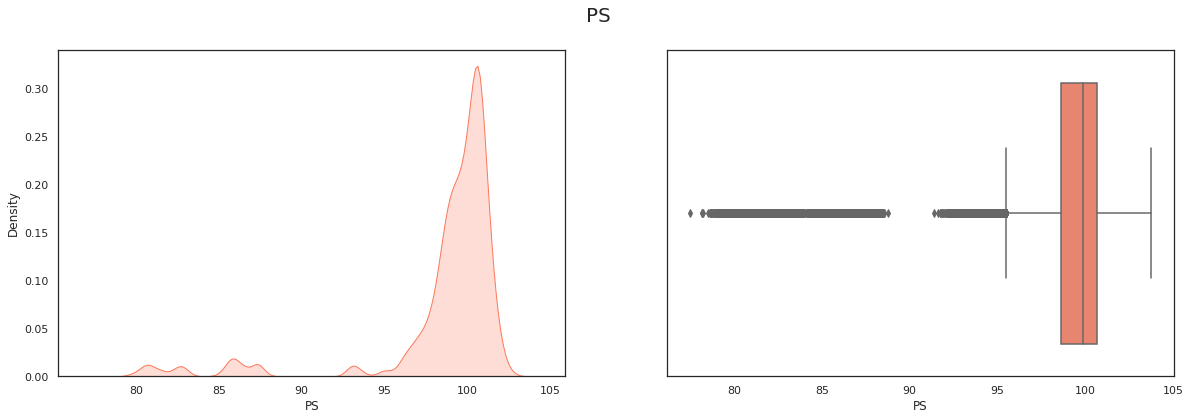

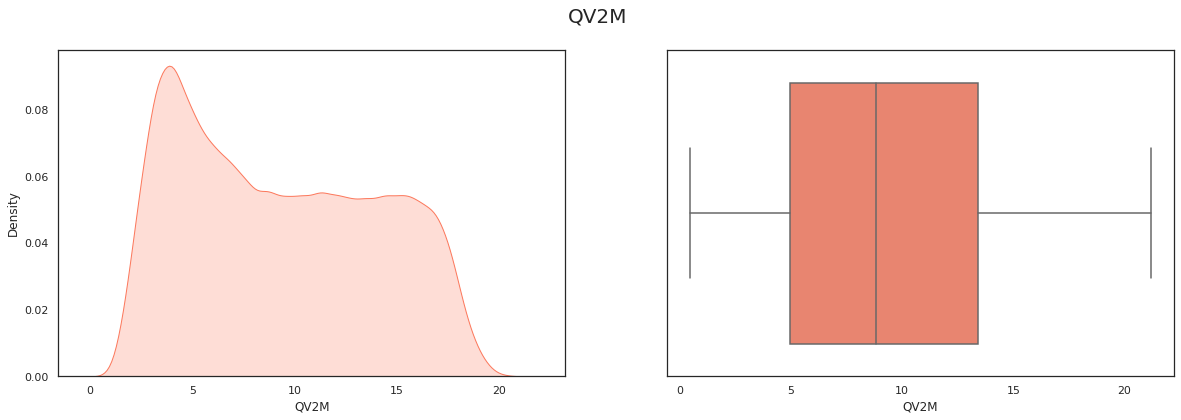

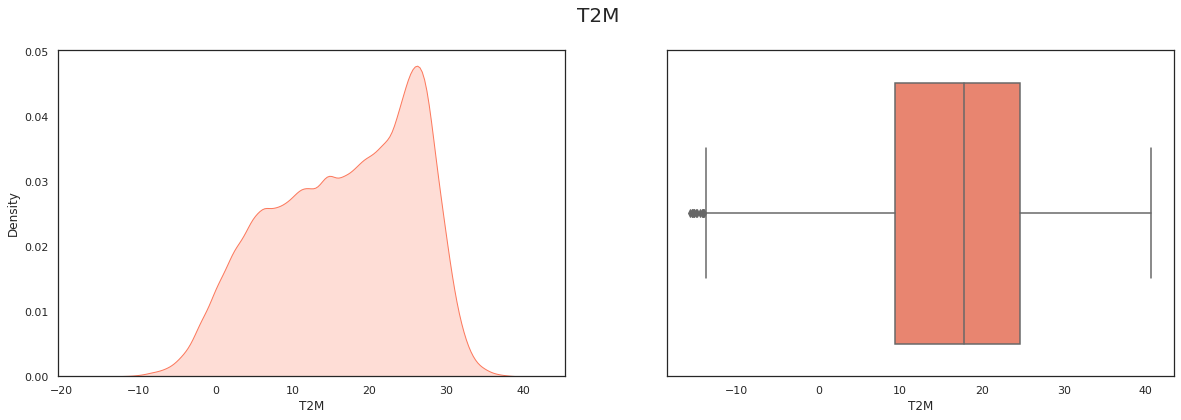

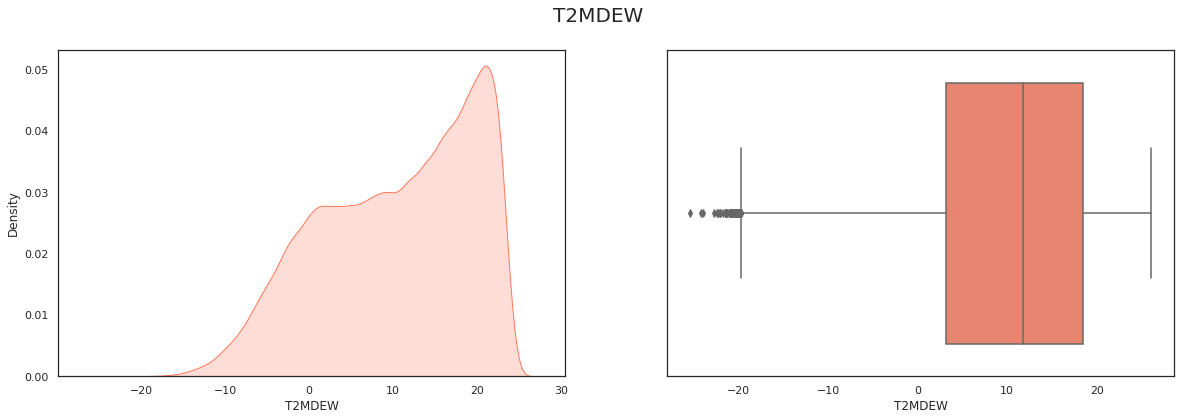

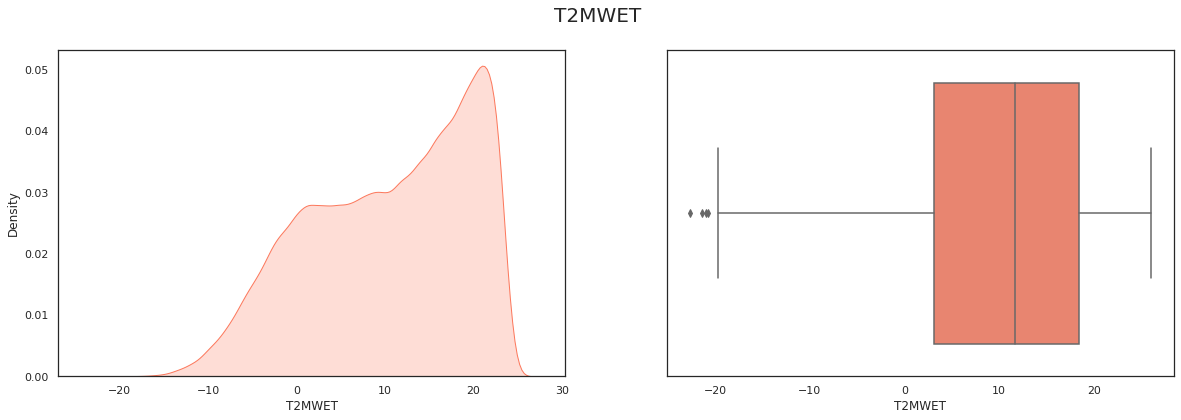

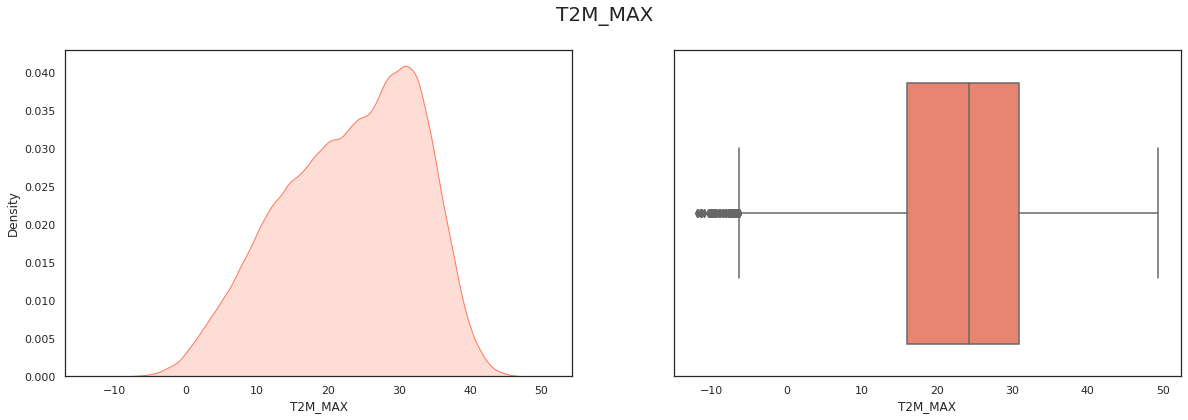

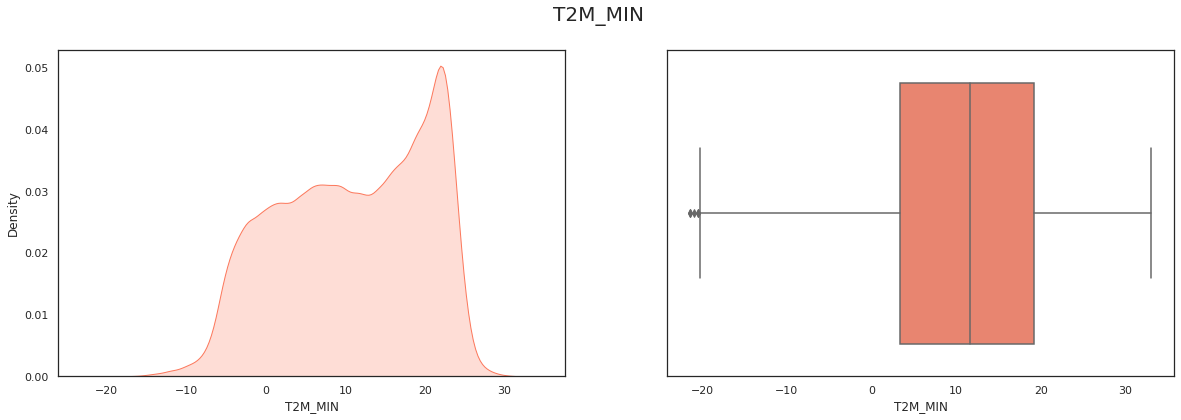

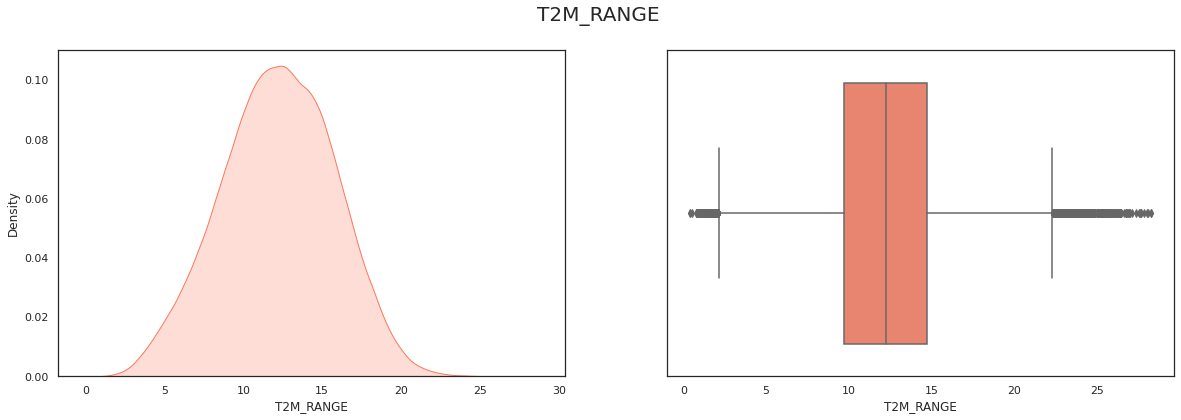

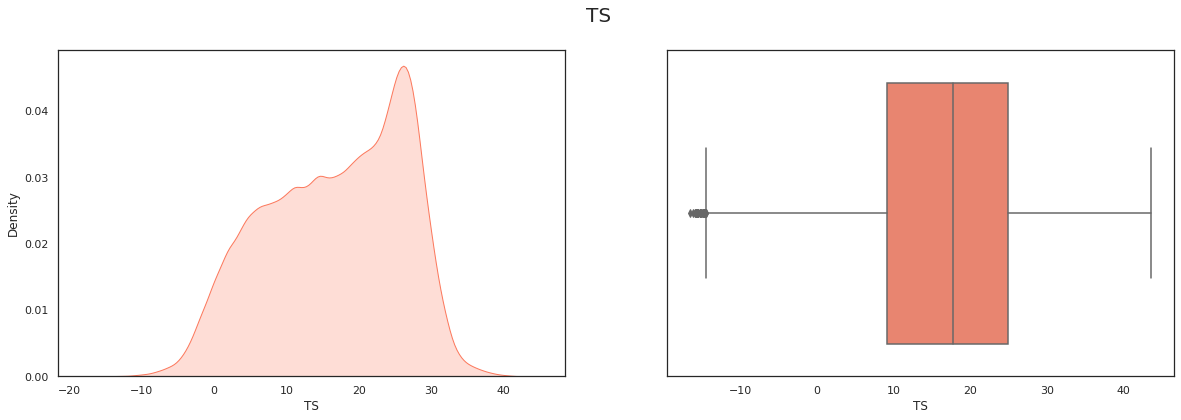

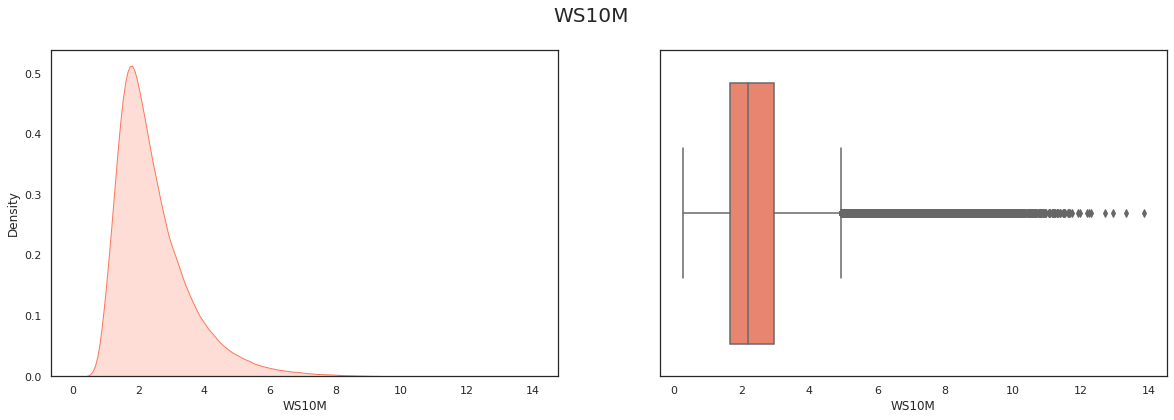

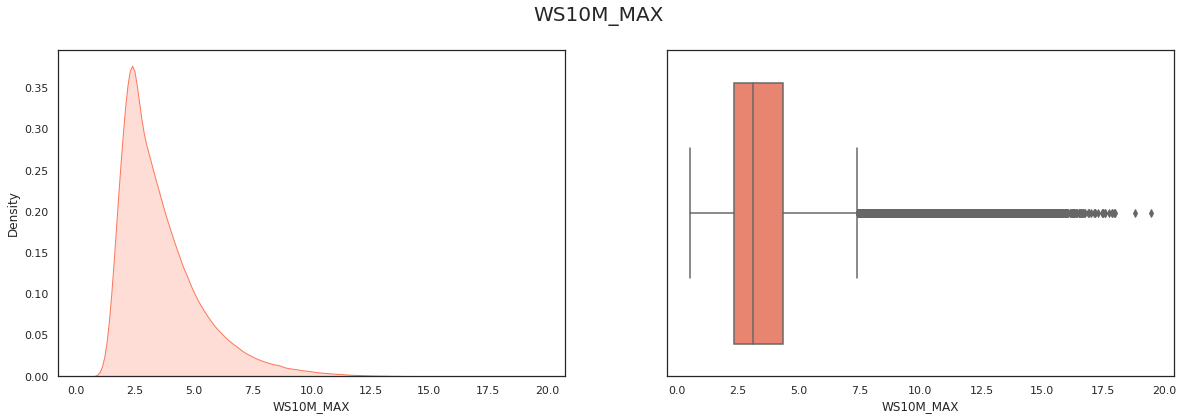

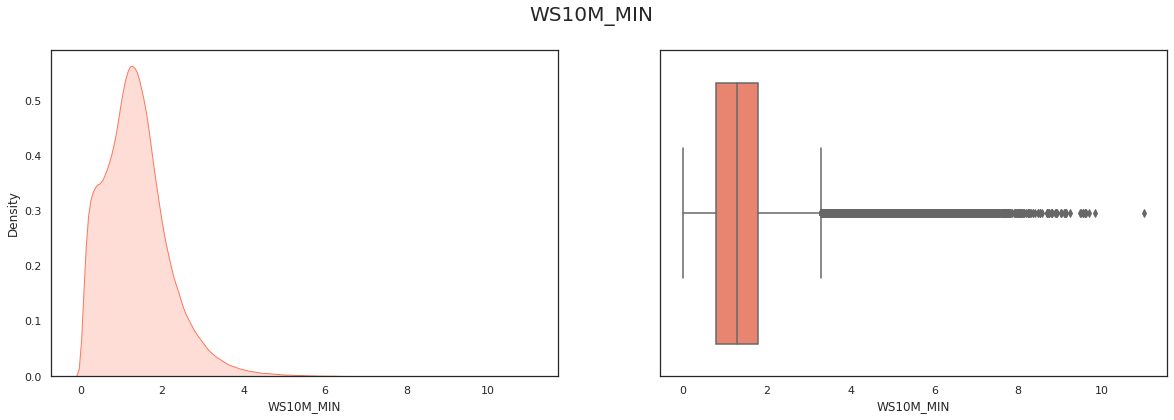

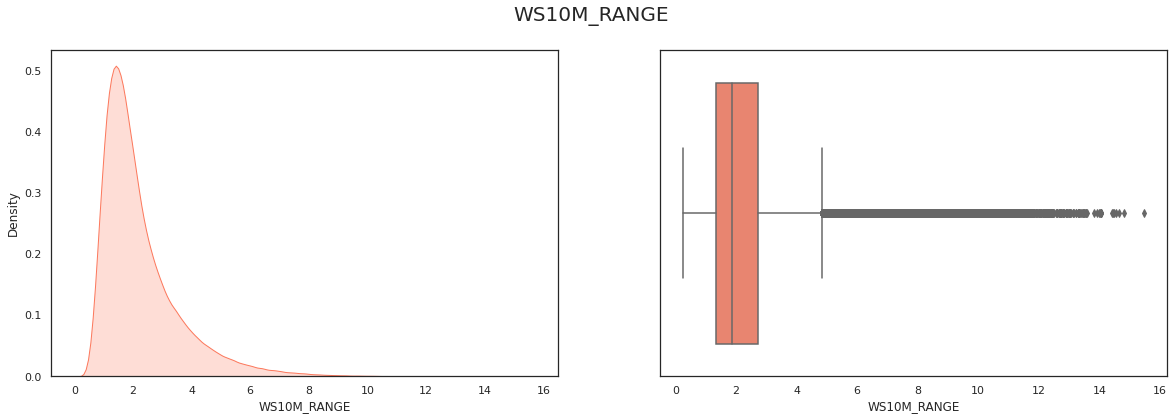

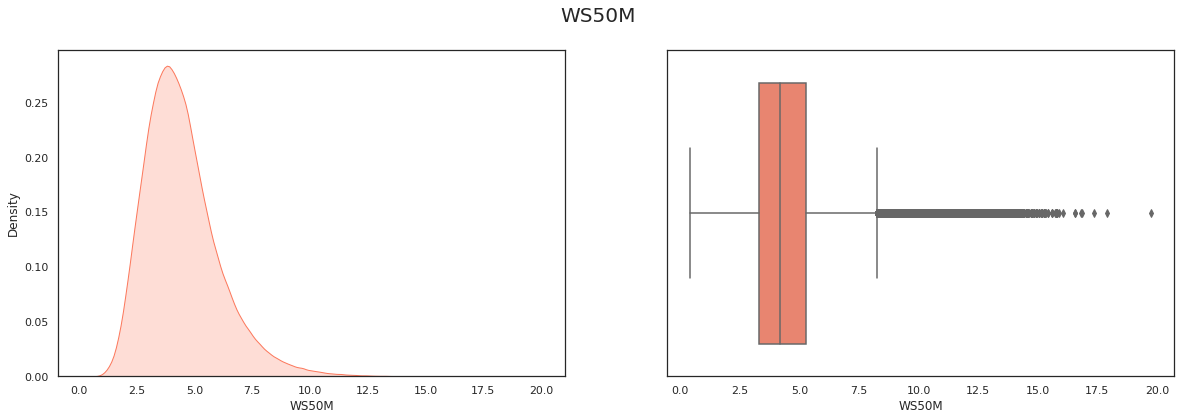

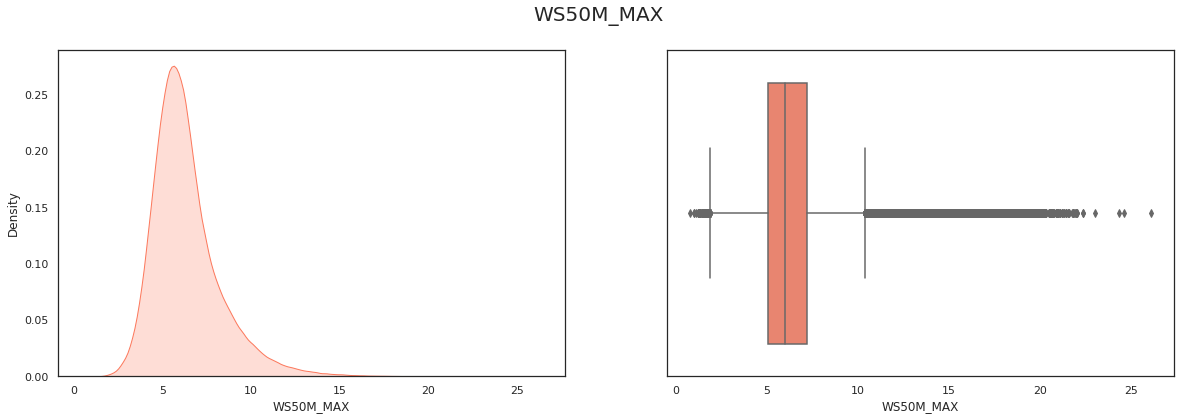

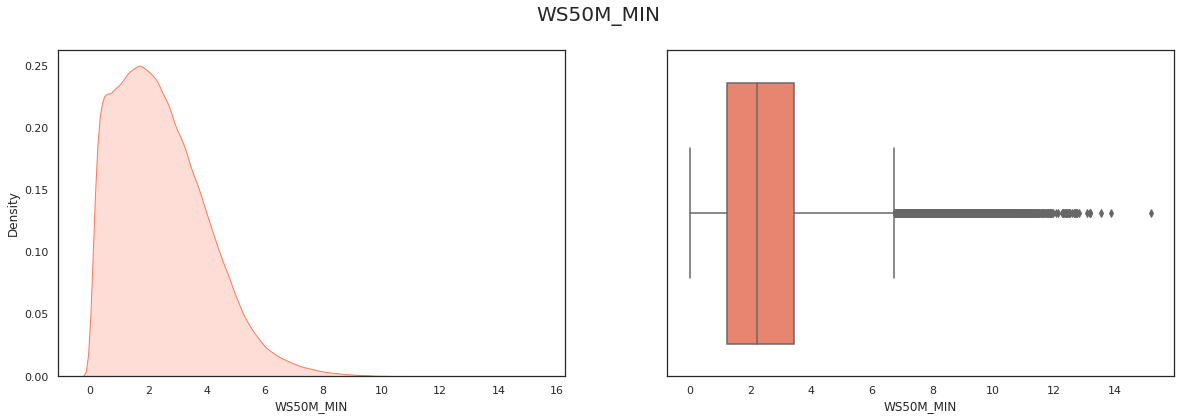

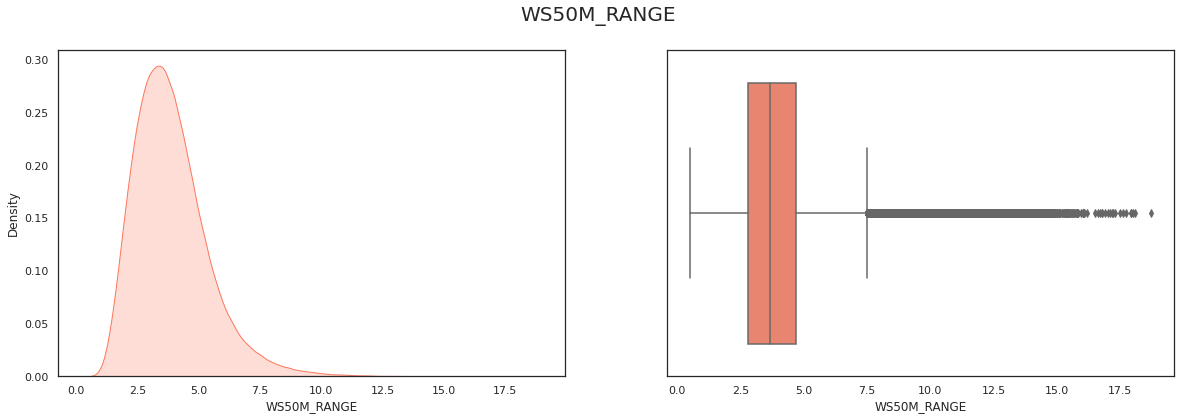

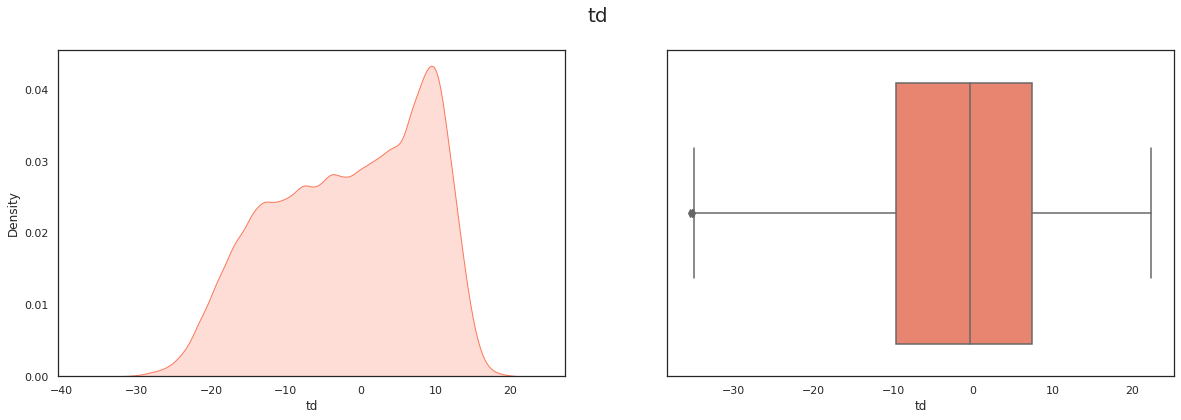

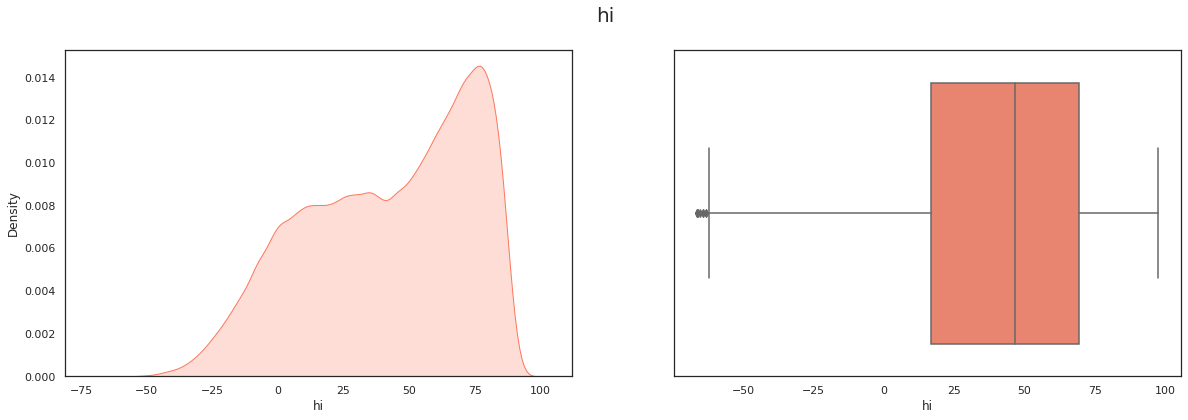

In [103]:
for i in numeric :
  fig,ax = plt.subplots(1,2,figsize=(20,6))
  palette_color = sns.color_palette('rocket_r')
  sns.kdeplot(df[i] , ax=ax[0] , color='#FC785C' , shade = True)
  sns.boxplot(df[i] , ax = ax[1] , color='#FC785C')
  plt.suptitle(i,size=20)
  plt.show()

> # Informations

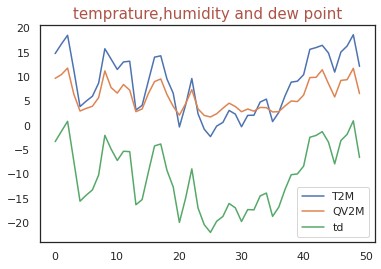

In [104]:
from numpy.core.fromnumeric import size
plt.plot(df['T2M'].head(50))
plt.plot(df['QV2M'].head(50))
plt.plot(df['td'].head(50))
plt.legend(['T2M' , 'QV2M' , 'td'])
plt.title('temprature,humidity and dew point' , c='#AE5347',size=15)
plt.show()

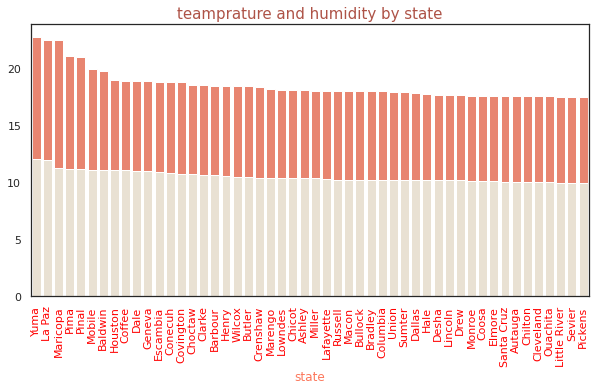

In [105]:
# temprature and humidity by state
groubed_hu = df.groupby('state')['QV2M'].mean().sort_values(ascending = False).head(50)
groubed_temp= df.groupby('state')['T2M'].mean().sort_values(ascending = False).head(50)
plt.figure(figsize = (10,5))
ax = sns.barplot(x=groubed_temp.index, y=groubed_temp.values , color='#FC785C')
sns.barplot(x=groubed_hu.index, y=groubed_hu.values, ax=ax, color='#ECE2D0')
ax.set_xticklabels(labels=groubed_temp.index , rotation = 90)
ax.xaxis.label.set_color('#FC785C')  
ax.tick_params(axis='x', colors='red') 
plt.title('teamprature and humidity by state' , c='#AE5347' , size=15)

plt.show()

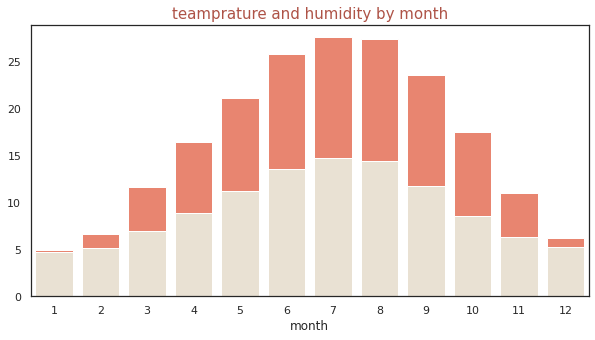

In [106]:
# temprature and humidity by month
groubed_hu = df.groupby('month')['QV2M'].mean()
groubed_temp= df.groupby('month')['T2M'].mean()
plt.figure(figsize = (10,5))
ax = sns.barplot(x=groubed_temp.index, y=groubed_temp.values , color='#FC785C')
sns.barplot(x=groubed_hu.index, y=groubed_hu.values, ax=ax, color='#ECE2D0')
ax.set_xticklabels(labels=groubed_temp.index)
plt.title('teamprature and humidity by month',c='#AE5347' , size=15)
plt.show()

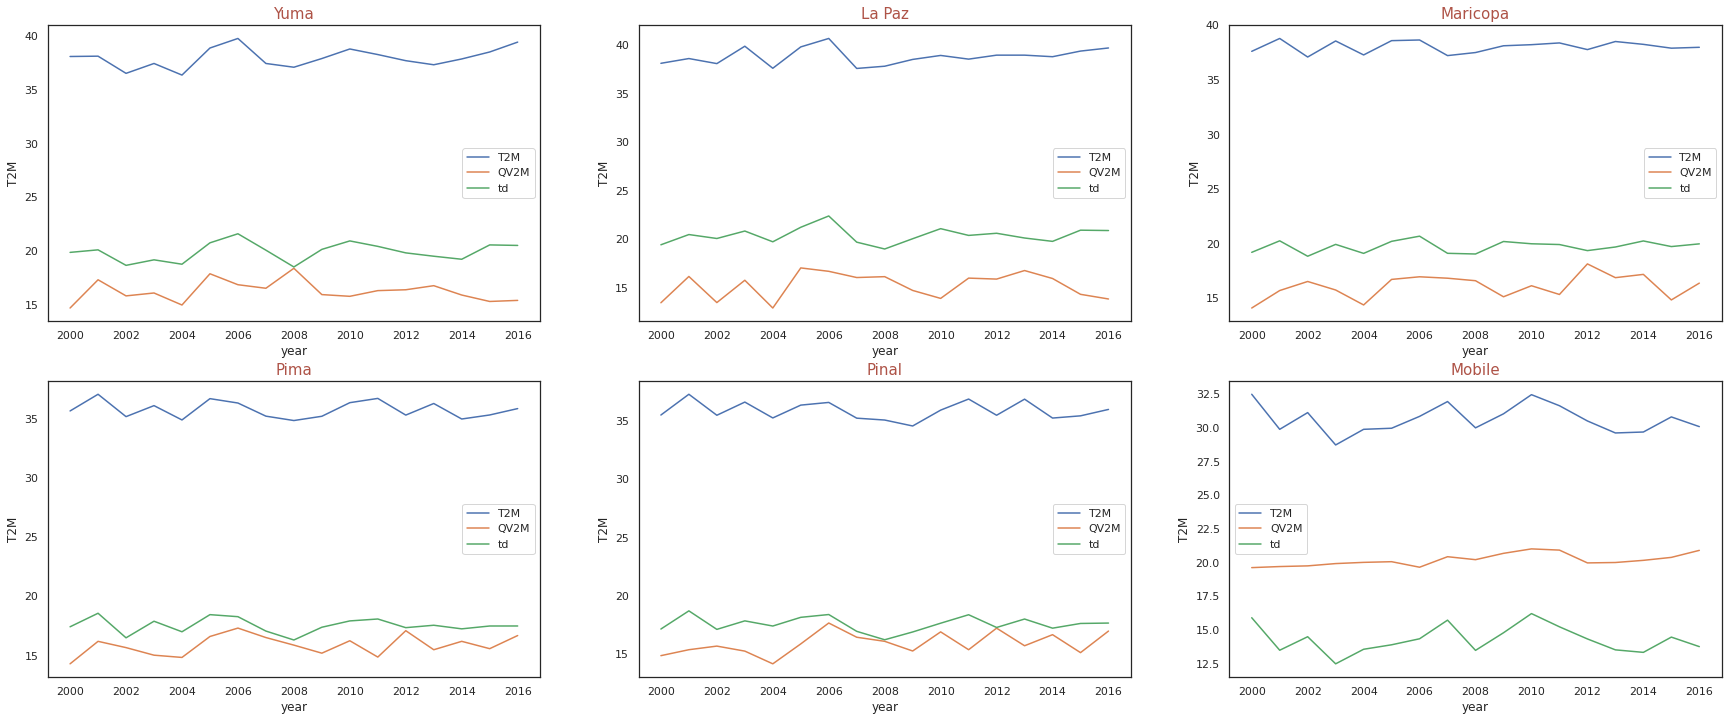

In [108]:
# temprature,humidity and dew point by state
highest_6_states = df.groupby('state',as_index=False)['T2M'].mean().sort_values('T2M' , ascending = False).head(6)

fig , ax = plt.subplots(2,3 , figsize=(30,12))

for idx , i in enumerate(highest_6_states['state']):
  groubed = df[df['state'] == i].groupby('year' , as_index = False).max()
  if idx <3:
    sns.lineplot(x=groubed['year'] , y = groubed['T2M'] ,ax=ax[0][idx%3])
    sns.lineplot(x=groubed['year'] , y = groubed['QV2M'],ax=ax[0][idx%3])
    sns.lineplot(x=groubed['year'] , y = groubed['td'],ax=ax[0][idx%3])
    ax[0][idx%3].legend(['T2M' , 'QV2M' , 'td'])
    ax[0][idx%3].set_title(i,c='#AE5347' , size=15)
  else:
    sns.lineplot(x=groubed['year'] , y = groubed['T2M'] ,ax=ax[1][idx%3])
    sns.lineplot(x=groubed['year'] , y = groubed['QV2M'],ax=ax[1][idx%3])
    sns.lineplot(x=groubed['year'] , y = groubed['td'],ax=ax[1][idx%3])
    ax[1][idx%3].legend(['T2M' , 'QV2M' , 'td'])
    ax[1][idx%3].set_title(i,c='#AE5347' , size=15)
plt.show()

In [109]:
groubed = df.groupby('state')['WS10M'].mean().sort_values(ascending = False).head(50)

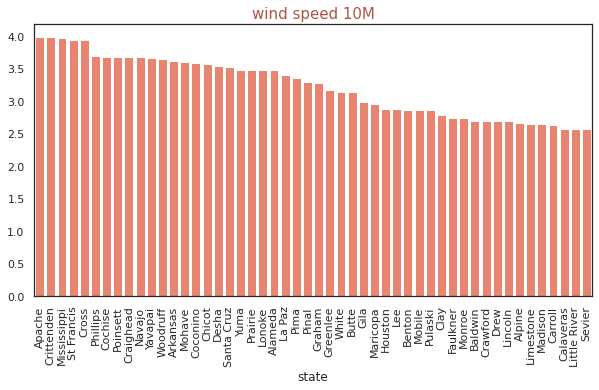

In [110]:
# wind speed by state
plt.figure(figsize = (10,5))
ax = sns.barplot(x=groubed.index, y=groubed.values, color='#FC785C')
ax.set_xticklabels(labels=groubed.index , rotation = 90)
plt.title('wind speed 10M' , c='#AE5347' , size=15)
plt.show()

> # prepare data for machine learning

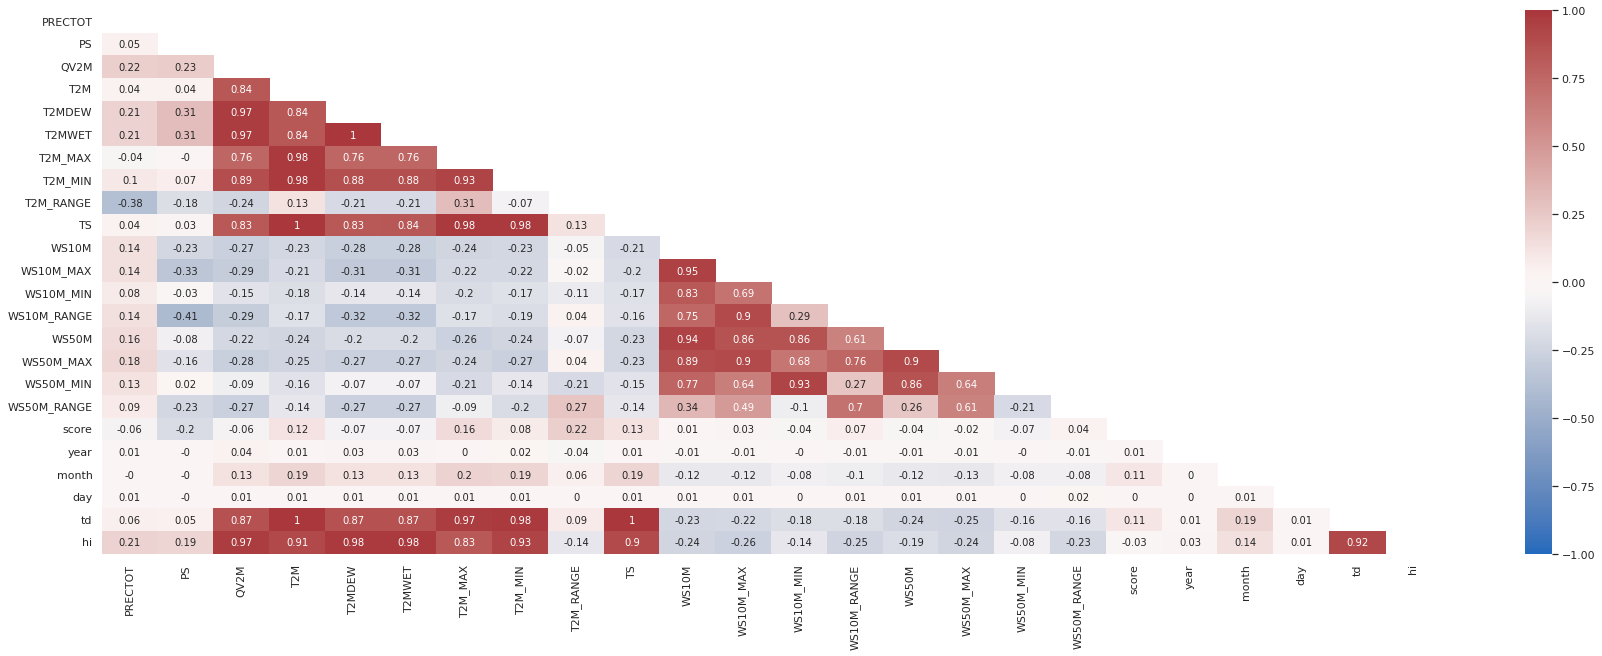

In [111]:
# feature selection using heatmap
plt.figure(figsize=(30,10))
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [112]:
df.columns

Index(['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE',
       'score', 'year', 'month', 'day', 'td', 'hi', 'state'],
      dtype='object')

In [113]:
data = df[['PRECTOT','PS','td' , 'hi' , 'WS10M' , 'score']]

In [120]:
def outliers(df) :
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df.index[(df <lower_bound) | (df > upper_bound)]
    return ls

In [121]:
def remove(df,ls):
    ls=sorted(set(ls))
    df.drop(ls,inplace = True)

In [123]:
# remove outliers
for i in data.drop('score',axis=1):
  ls = outliers(df[i])
  remove(df,ls)

In [114]:
data.dropna(inplace=True)

In [115]:
data['score'] = data['score'].round().astype(int)

In [116]:
# separate target feature from independent features
x = data[['PRECTOT','PS','td' , 'hi']]
y =data['score']

In [117]:
# split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [118]:
# solve impalance problem
sm = SMOTE(random_state = 5)
X_train_ures_SMOTE, y_train_ures_SMOTE = sm.fit_resample(X_train, y_train.ravel())

In [119]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(X_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))
print("Counts of label '2' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 2),sum(y_train_ures_SMOTE == 2)))
print("Counts of label '3' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 3),sum(y_train_ures_SMOTE == 3)))
print("Counts of label '4' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 4),sum(y_train_ures_SMOTE == 4)))
print("Counts of label '5' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 5),sum(y_train_ures_SMOTE == 5)))

Before OverSampling, the shape of train_X: (95698, 4)
Before OverSampling, the shape of train_y: (95698,) 

After OverSampling, the shape of train_X: (316776, 4)
After OverSampling, the shape of train_y: (316776,) 

Counts of label '0' - Before Oversampling:52796, After OverSampling: 52796
Counts of label '1' - Before Oversampling:16821, After OverSampling: 52796
Counts of label '2' - Before Oversampling:11728, After OverSampling: 52796
Counts of label '3' - Before Oversampling:8170, After OverSampling: 52796
Counts of label '4' - Before Oversampling:4161, After OverSampling: 52796
Counts of label '5' - Before Oversampling:2022, After OverSampling: 52796


__Note__
- score column have nulls but i cant delete it because it is a target column